In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras import layers, models

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
file_path = '/content/drive/My Drive/RegresiUTSTelkom.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris awal
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [13]:
#Pembersihan & Feature Engineering
df = df.drop(columns=['Nama'], errors='ignore')


In [14]:
# Buat nama kolom
num_features = df.shape[1] - 1
new_columns = ['target'] + [f'feature_{i+1}' for i in range(num_features)]

# Ganti nama kolom
df.columns = new_columns
print(df.head())
# Pisahkan fitur dan target
X = df.drop(columns=['target'])
y = df['target']

   target  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    2001   48.73215   18.42930   70.32679   12.94636  -10.32437  -24.83777   
1    2001   50.95714   31.85602   55.81851   13.41693   -6.57898  -18.54940   
2    2001   48.24750   -1.89837   36.29772    2.58776    0.97170  -26.21683   
3    2001   50.97020   42.20998   67.09964    8.46791  -15.85279  -16.81409   
4    2001   50.54767    0.31568   92.35066   22.38696  -25.51870  -19.04928   

   feature_7  feature_8  feature_9  ...  feature_81  feature_82  feature_83  \
0    8.76630   -0.92019   18.76548  ...     5.66812   -19.68073    33.04964   
1   -3.27872   -2.35035   16.07017  ...     3.03800    26.05866   -50.92779   
2    5.05097  -10.34124    3.55005  ...    34.57337  -171.70734   -16.96705   
3  -12.48207   -9.37636   12.63699  ...     9.92661   -55.95724    64.92712   
4   20.67345   -5.19943    3.63566  ...     6.59753   -50.69577    26.02574   

   feature_84  feature_85  feature_86  feature_87 

In [15]:
# Pastikan target numerik
df['target'] = pd.to_numeric(df['target'], errors='coerce')  # ubah ke float, NaN kalau gagal

# Buang baris yang target-nya NaN
df = df.dropna(subset=['target'])

# Deteksi nilai ekstrem
print("Target min:", df['target'].min(), "Target max:", df['target'].max())

# Cek ringkasan
print(df['target'].describe())

Target min: 1922 Target max: 2011
count    515344.000000
mean       1998.397077
std          10.931056
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: target, dtype: float64


In [24]:
#PIPELINE REGRESI
#split data dan normalisasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
#MLP Regresi
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


In [28]:
#train model regresi
history = model_reg.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 561041.8750 - mae: 455.8714 - val_loss: 652.5389 - val_mae: 16.6987
Epoch 2/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 361.6171 - mae: 11.9872 - val_loss: 171.2868 - val_mae: 9.1623
Epoch 3/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 58s 6ms/step - loss: 229.8855 - mae: 9.8065 - val_loss: 280.5709 - val_mae: 12.3687
Epoch 4/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 187.4625 - mae: 9.4502 - val_loss: 259.8600 - val_mae: 11.4417
Epoch 5/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 212.3806 - mae: 9.5718 - val_loss: 130.2725 - val_mae: 8.0420
Epoch 6/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 174.2038 - mae: 9.1780 - val_loss: 133.7126 - val_mae: 7.8856
Epoch 7/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 157.4617 - mae: 8.9410 - val_loss: 148.4315 - val_mae: 8.4056
Epoch 8/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 173.1182 - mae: 9.0129 - val_loss: 10

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
MSE: 104.23118591308594
RMSE: 10.209367556958949
R2: 0.12180101871490479


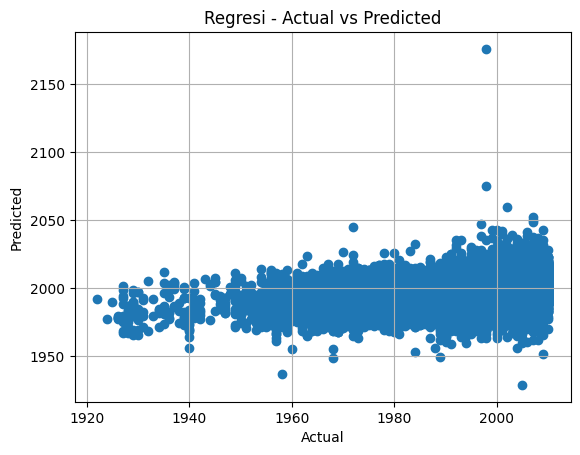

In [29]:
#evaluasi regresi
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

y_pred = model_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regresi - Actual vs Predicted")
plt.grid(True)
plt.show()


In [30]:
#PIPELINE KLASIFIKASI
#Binarisasi target
median_val = df['target'].median()
df['target_class'] = (df['target'] > median_val).astype(int)


In [31]:
#split data dan normalisasi
X = df.drop(['target', 'target_class'], axis=1)
y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
#model MLP Klasifikasi
model_clf = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
#train model klasifikasi
history = model_clf.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.7029 - loss: 0.5753 - val_accuracy: 0.7281 - val_loss: 0.5418
Epoch 2/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7312 - loss: 0.5370 - val_accuracy: 0.7332 - val_loss: 0.5341
Epoch 3/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.7348 - loss: 0.5297 - val_accuracy: 0.7350 - val_loss: 0.5318
Epoch 4/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7387 - loss: 0.5258 - val_accuracy: 0.7340 - val_loss: 0.5321
Epoch 5/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7391 - loss: 0.5234 - val_accuracy: 0.7356 - val_loss: 0.5290
Epoch 6/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7415 - loss: 0.5203 - val_accuracy: 0.7363 - val_loss: 0.5290
Epoch 7/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7439 - loss: 0.5177 - val_accuracy: 0.7364 - val_loss: 0.5318
Epoch 8/50
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 

3221/3221 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     54002
           1       0.73      0.70      0.72     49067

    accuracy                           0.73    103069
   macro avg       0.73      0.73      0.73    103069
weighted avg       0.73      0.73      0.73    103069

AUC-ROC: 0.810322742103966


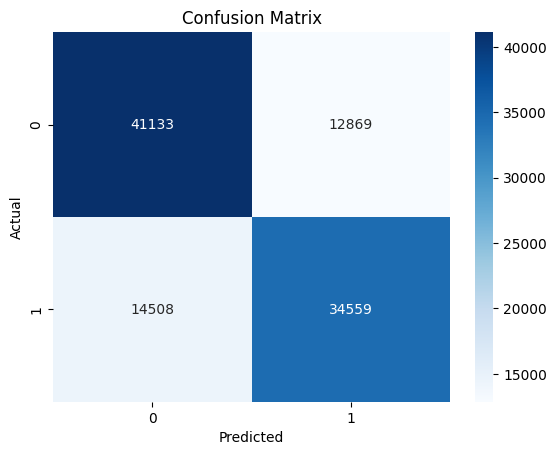

In [35]:
#evaluasi klasifikasi
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns

y_pred_prob = model_clf.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
